In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("AAPL.csv")

In [3]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
dt=df["close"]
dt.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [7]:
dt.shape

(1258,)

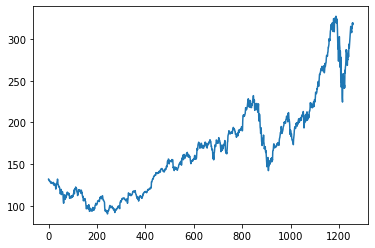

In [8]:
plt.plot(dt)

In [24]:
length_x=int(len(dt)*0.65)
length_y=int(len(dt)-length_x)
length_x,length_y

(817, 441)

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(dt).reshape(-1,1))

In [37]:
train=df1[0:length_x]
train.shape
test=df1[length_x:len(dt)]
train.shape,test.shape

((817, 1), (441, 1))

In [38]:
train

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [57]:

def data_processing(dataset,timestep):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return np.array(dataX), np.array(dataY)
        

In [58]:
x_train,y_train=data_processing(train,100)
x_test,y_test=data_processing(test,100)

In [59]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [60]:
print(x_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [62]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [64]:
x_train.shape,x_test.shape

((716, 100, 1), (340, 100, 1))

In [65]:
from tensorflow import keras

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [66]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 8s 654ms/step - loss: 0.0198 - val_loss: 0.0603
Epoch 2/10
12/12 [==============================] - 5s 386ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/10
12/12 [==============================] - 6s 468ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 4/10
12/12 [==============================] - 7s 594ms/step - loss: 8.5807e-04 - val_loss: 0.0039
Epoch 5/10
12/12 [==============================] - 4s 355ms/step - loss: 6.6855e-04 - val_loss: 0.0046
Epoch 6/10
12/12 [==============================] - 4s 347ms/step - loss: 6.1122e-04 - val_loss: 0.0039
Epoch 7/10
12/12 [==============================] - 6s 473ms/step - loss: 6.0628e-04 - val_loss: 0.0037
Epoch 8/10
12/12 [==============================] - 5s 403ms/step - loss: 5.9294e-04 - val_loss: 0.0038
Epoch 9/10
12/12 [==============================] - 4s 366ms/step - loss: 6.1094e-04 - val_loss: 0.0038
Epoch 10/10
12/12 [==============================] - 4s 357ms/step - loss: 5

In [70]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [71]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

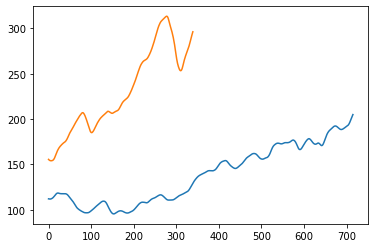

In [73]:
plt.plot(train_predict)
plt.plot(test_predict)

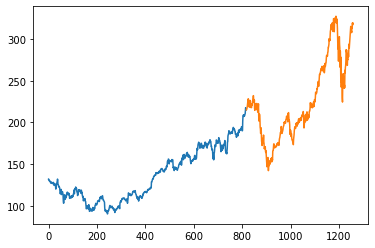

In [75]:
plt.plot(dt[0:length_x])
plt.plot(dt[length_x:len(dt)])

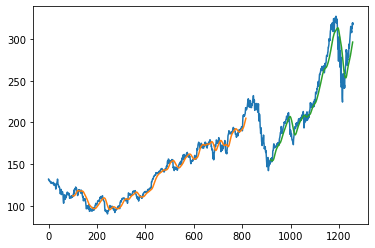

In [77]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()